In [2]:
import math
import datetime as dt
import matplotlib.pyplot as plt
import json

plt.rcParams["figure.figsize"] = [9, 6]
plt.rcParams["figure.dpi"] = 96

def lin_fit(yy):
    """Aproksimacija z linearno funkcijo po metodi najmanjših kvadratov."""
    """https://mathworld.wolfram.com/LeastSquaresFitting.html"""
    """y = a + b * x"""
    n = len(yy)
    xx = [x for x in range(n)]

    sum_x = sum(xx)
    sum_y = sum(yy)
    sum_x_2 = sum(x ** 2 for x in xx)
    sum_x_y = sum(x * y for (x, y) in zip(xx, yy))

    a = (sum_y * sum_x_2 - sum_x * sum_x_y) / (n * sum_x_2 - sum_x ** 2)
    b = (n * sum_x_y - sum_x * sum_y) / (n * sum_x_2 - sum_x ** 2)
    return a, b


def exp_fit(yy):
    """Aproksimacija z eksponentno funkcijo po metodi najmanjših kvadratov."""
    """https: // mathworld.wolfram.com/LeastSquaresFittingExponential.html"""
    """y = a * b^x"""
    n = len(yy)
    xx = [x for x in range(n)]

    sum_x = sum(xx)
    sum_x_2 = sum(x ** 2 for x in xx)
    sum_log_y = sum(math.log(y) for y in yy)
    sum_x_log_y = sum(x * math.log(y) for (x, y) in zip(xx, yy))

    a = (sum_log_y * sum_x_2 - sum_x * sum_x_log_y) / (n * sum_x_2 - sum_x ** 2)
    b = (n * sum_x_log_y - sum_x * sum_log_y) / (n * sum_x_2 - sum_x ** 2)
    return math.exp(a), math.exp(b)

In [3]:
# https://www.nijz.si/sl/dnevno-spremljanje-okuzb-s-sars-cov-2-covid-19
class Data:
    def __init__(self):
        with open("data.json") as f:
            data = json.load(f)
        self.infections = [x["cases"]["active"] for x in data]
        self.days = [dt.date(2020, 2, 24) + dt.timedelta(t) for t, _ in enumerate(self.infections)]

Prikaz potrjenih okužb (logaritemska skala).

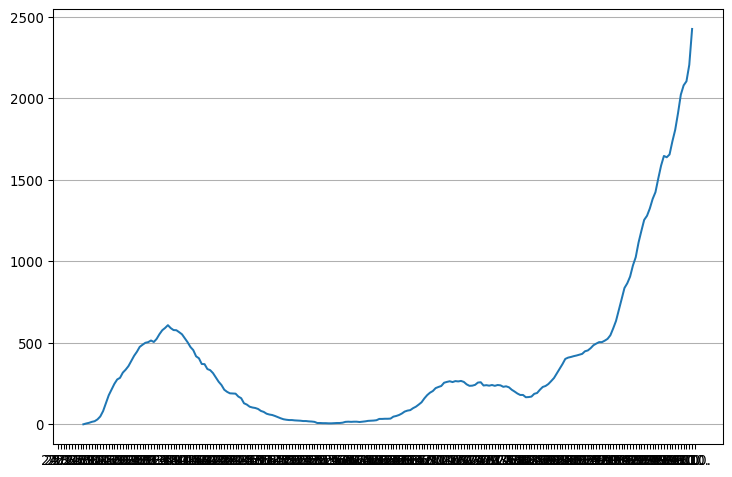

In [4]:
data = Data()
infections = data.infections
days = data.days
_, ax = plt.subplots()
ax.set_xticks(days)
ax.set_xticklabels(["{}.{}.".format(d.day, d.month) for d in days])
# ax.set_yscale("log")
plt.plot(days, infections)
# plt.scatter(days, infections)
plt.grid(axis="y")
plt.show()

Vidimo, da nam graf razpade na tri bistveno različna obdobja. Od 5.3.--14.3. nam zelo strmo eksponentno narašča, nato polj položno, a še vedno eksponentno, okoli 28.3. pa se eksponentna rast konča. Aproksimirajmo vse te tri odseke z linearno (oranžna) in eksponentno (zelena) funkcijo.

In [5]:
def approximate(begin, end):
    data = Data()
    infections = data.infections[begin:end]
    days = data.days[begin:end]

    lin_a, lin_b = lin_fit(infections)
    exp_a, exp_b = exp_fit(infections)
    predicted_lin = [lin_a + lin_b * t for t, _ in enumerate(infections)]
    predicted_exp = [exp_a * exp_b ** t for t, _ in enumerate(infections)]

    print("%.3g * %.5g^n" % (exp_a, exp_b))

    _, ax = plt.subplots()
    ax.set_xticks(days)
    ax.set_xticklabels(["{}.{}.".format(d.day, d.month) for d in days])
    # ax.set_yscale("log")
    plt.plot(days, infections)
    plt.plot(days, predicted_lin)
    plt.plot(days, predicted_exp)
    plt.scatter(days, infections)
    plt.grid(axis="y")
    plt.show()

642 * 1.048^n


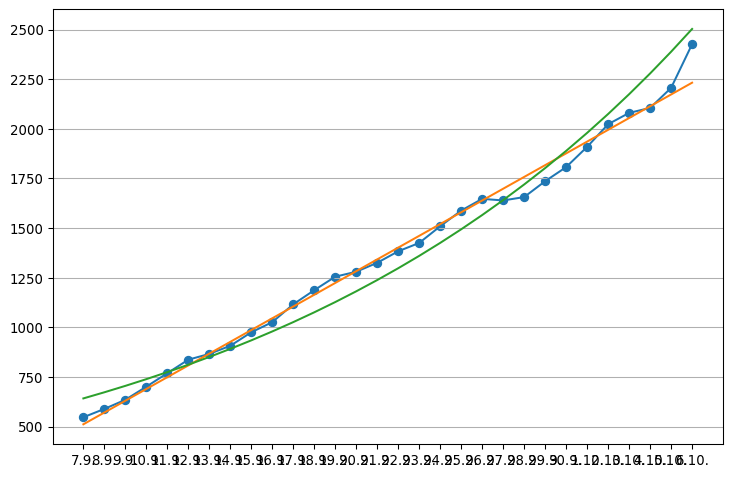

In [9]:
approximate(196, 226)

Do 14.3. je naraščalo eksponentno s 54 % dnevnim prirastom, do 28.3. z 9 %, nato pa se je rast umirila in ni več eksponentna.

In [13]:
1.048**21 * 20

53.53242673180987